# Amphi 2 - Optimization in Deep Learning

# 1. Difference between Learning and Pure Optimization

## 1.1 Performance, Risk and Empirical Risk.

In most machine learning scenarios, we choose some performance measure $P$, and introduce a cost function $L(\mathbf w)$ with the hope that improving $L$ will get better $P$. Normally

$$
J(\mathbf w) = \sum_{n=1}^N L(f(\mathbf x_n, \mathbf w), t_n)
$$

where $\mathbf x_n, t_n$ is the $n$-th observation.

But in fact, we prefer minimizing the expectation across the data generating distribution $p$ rather than just over the finite training set

$$
\tilde J(\mathbf w) = \mathbf E_{\mathbf x, t \sim p} \left[ L(f(\mathbf x, \mathbf w), t) \right]
$$

This second quantity $J$ is often called **risk** and the first quantity above is called **empirical risk**. We don't know about $p$ so cannot evaluate risk. We solve the problem by using empirical risk optimization with hope that empirical risk approximates risk.

## 1.2 Surrogate Loss Functions and Early Stopping

Notion of **surrogate loss function**: acts as a proxy for the exact expected loss.

Example: In binary classification, the exact expected loss 0-1 is intractable (exponential in the input dimension), so the negative log-likelihood is used as a surrogate loss function.

The surrogate loss function sometimes allows to learning more: for example, while the training loss using loss 0-1 attain 0, the test loss does not. If we use the surrogate loss, we can continue to decrease the loss on test set.

Important difference between pure optimization and training algorithms is that training algorithms do not usually halt at a local minimum. Training algorithms halts when a convergence criterion based on early stopping is statisfied. Early stopping criterion may be based on the true underlying loss function -> avoid overfitting. Training often halts while the surrogate loss function still has large derivatives.

## 1.3 Batch and Minibatch Algorithms

Objective function of learning is usually a sum over the training examples. Typically, we update the parameters based on the mean of cost function estimated only on a subset of the terms of the full cost functions.

For example

$$
\mathbf w_{ML} = \arg\max_{\mathbf w} \sum_{n=1}^N \log p(\mathbf x_{(n)}, t_{(n)}, \mathbf w)
$$

The gradient is calculated by

$$
\nabla_\mathbf w J(\mathbf w) = \frac1N \sum_{n=1}^N \nabla_\mathbf w \log p(\mathbf x_n, t_n; \mathbf w)
$$

Calculation is expensive because ot requires evaluating the model on the whole training data set. We can instead use a smaller number of observations from the data set and taking the average over only these examples.

$$
\nabla_\mathbf w J(\mathbf w) = \frac1{|S|} \sum_{S} \nabla_\mathbf w \log p(\mathbf x, t; \mathbf w)
$$

Optimizarion algorithms that use the entire training set to calculate the gradient are called **batch** or **deterministic** gradient methods. Algorithms that use only a single example of a time are called **stochastic** or **online** methods. Methods that use a subset of the training set are called **minibatch** or **minibatch stochastic** methods. They are now also called simply **stochastic** methods.

# 2. Challenges in Optimization with Neural Networks

## 2.1 Ill-conditioning

Taylors expansion of a function at $x_0$ is expressed as
$$
f(\mathbf x) \approx f(\mathbf x_0) + \nabla f(\mathbf x_0) \cdot (\mathbf x - \mathbf x_0) + \frac12 (\mathbf x-\mathbf x_0)^t \mathbf H(\mathbf x_0) (\mathbf x-x_0)
$$

where $\mathbf H$ the Hessian matrix.

If we follow the inverse direction of $\mathbf g = \nabla f(\mathbf x_0)$, we can set $\mathbf x - \mathbf x_0 = -\epsilon\mathbf g$, we have

$$
f(\mathbf x) \approx f(\mathbf x_0) - \epsilon \Vert \mathbf g \Vert^2 + \frac12 \epsilon^2 \mathbf g^t \mathbf H \mathbf g
$$

If we choose sufficiently large $\epsilon$, $\frac12 \epsilon^2 \mathbf g^t \mathbf H \mathbf g$ will exceed $\epsilon \Vert \mathbf g \Vert^2$, so make the cost function increases. This happens when, for example

$$
\epsilon > \frac{2 \Vert \mathbf g \Vert^2}{\mathbf g^t \mathbf H \mathbf g}
$$

So we need to choose $\epsilon$ small enough. 

In case $\frac{2 \Vert \mathbf g \Vert^2}{\mathbf g^t \mathbf H \mathbf g}$ very small (case where the greatest eigenvalue of $H$ is much larger than the smallest and $\mathbf g$ is an eigenvector of $H$ associated to the greatest eigenvalue), $\epsilon$ is also very small and harm the convergence rate.

**Illustration from [1]**

<img src="F1.png" width=600></img>

## 2.2 Local Minima

**Feed Forward Networks** have **weight space symmetry**

Neural networks with latent variables are usually not **identifiable** because of **weight space symmetry**. That means if we interchange any 2 hidden units in a layer and re-assign weights corresponding to them, then the new neural network is equivalent to the previous one (predict the same output from the same input).

<img src="F2.png" width=600></img>

For a 2-layer network with $M$ units at the hidden layer, this can create $2^M$ equivalent network yielding the same result. So if the minimization problem has at least one local minimum, it can have roughly $2^M$ local minima. We have more chance to fall into a local minimum than a global minimum.

A local minimum is acceptable if its cost is not too high in comparison with the global minimum's cost. The question is: in deep networks, does local minima with high cost appear a lot?

*"Expert now suspect that, for sufficiently large neural networks, most local minima have a low cost function value, and that it is not important to find a true global minimum rather than to find a point in parameter space that has low but not minimal cost
(Saxe et al., 2013; Dauphin et al., 2014; Goodfellow et al., 2015; Choromanska et al., 2014)."*

This is just a hypothesis, we need to carefully test for specific problems. 


## 2.3 Saddle Points

In large dimensionality, local extrema are very rare in comparison to saddle points.

**Random functions $f: \mathbf R^D \to \mathbf R$**
- The expected ratio of the number of saddle points to the number of minima grows exponentially with $D$
- Local minima are much more likely to have low cost than high cost. Critical points with high cost are more likely to be saddle points than local minima.

**Feed-forward networks without non-linear hidden unit, but with non-convex loss functions**
- (Saxe et al., 2013) The function has global minima and saddle points, and no other local minima

**General feed-forward networks**
- (Dauphin et al., 2014) There exist real neural networks also have loss functions that contain very high-cost saddle points
- (Chromanska) Another class of high-dimensional random related to neural networks contain high-cost saddle points.

**Problems with saddle points**
- For first-order methods: situation unclear. Although the gradient is small near saddle point, empirical experiments shows that it can escape saddle points in many cases.
- For second-order methods: apply Newton methods can jump to a saddle point.
- Improvement: (Daupihin et al., 2014): saddle-free Newton method, but computation is very costly.

## 2.4 Cliffs and Longterm Dependencies

- Deep networks can have many steep regions (cliffs), result from the multiplication of large weights together. 
- Gradient update can move the weights extremely far.
- Improvements: gradient clipping (reduce the step size to be small enough that it it less likely to go outside the region)
- In deep recurrent network, while doing gradient update, we often calculate repeat multiplication, for example $\mathbf W^k$ for large $k$. If some eigenvalue of $\mathbf W$ is not near 1, it becomes very large or vanish, which make it difficult to choose the good direction (if eigenvalues vanish) or make the learning unstable (if eigenvalues explode). This phenomenon usually happens for recurrent network (which use matrix exponentiation) and happens less for Feed Forward Network (multiplication of different matrices). FFN can largely avoid long-term dependencies (Sussollo, 2014)

<img src="F3.png" width=600></img>

## 2.5 Inexact Gradients

Gradient and Hessian may not usually be calculated accurately, and small variation of them can lead to big variation in the update.

# 3. First-order Method

## 3.1 Gradient Descent

### Algorithm
---

**Init**

- Learning rate $\epsilon$
- Initial parameter $\mathbf w$

**while stopping criterion not met**
- Calculate gradient 
$$
\mathbf g = \frac1N \nabla \sum_n L(f(\mathbf x_{(n)}, \mathbf w), y_{(n)})
$$
- Update $\mathbf w$
$$
\mathbf w = \mathbf w -\epsilon \mathbf g
$$

**End while**

---

### Remarks

### 1. How to choose $\epsilon$?

Strategies:

- Keep it constant, try and choose the best by trial and error.
- **Line search**: At each step $k$, try several $\epsilon_k$ (0.001, ..., 0.01, 0.02, 0.05, 0.1, ..., 1) and choose the one with lowest cost
- Use Hessian
$$
\epsilon_k = \frac{2\mathbf g^t \mathbf g}{\mathbf g^t \mathbf H \mathbf g}
$$


### 2. Pro and con?

- Good direction to find local minimum
- $O(N)$ at each step
- Poor in ill-conditioning case



### 2. Pros and cons?

- Complexity $O(M)$. Computation time does not grow with $N$
- Zig-zag due to randomness

- When apply to a convex problem, the **excess error** $J(\mathbf w) - \min J(\mathbf w)$ is $O(\frac1{\sqrt k})$ in expectation ($O(1/k)$ if strongly convex)

- Sometimes can escape local minimum

- Escape saddle points better than the batch version.

## 3.2 Stochastic Gradient Descent

### Algorithm
---

**Init**

- Learning rate $\epsilon_k$
- Initial parameter $\mathbf w$

**while stopping criterion not met**

- Sample $M$ examples from the training set $\mathbf x_{(1)}, \ldots, \mathbf x_{(M)}$
- Compute the gradient estimate:
$$
 \mathbf g = \frac1M \nabla \sum_{m=1}^M L(f(\mathbf x_{(m)}, \mathbf w), y_{(m)})
$$

- Update:
$$
\mathbf w = \mathbf w - \epsilon_k \mathbf g
$$

**end while**

---

### Remarks

### 1. How to choose $\epsilon_k$?

- Keep it constant. (Not a good choice because $\mathbf g$ does vanish although at local minima)
- Use a decay $\alpha$ until iteration $\tau$

$$
\epsilon_k = (1-\alpha)\epsilon_0 + \alpha \epsilon_\tau
$$

where $\alpha = k/\tau$

In fact, a sufficient condition to guarantee convergence is that
$$
\sum_{k=1}^\infty \epsilon_k = \infty
$$

and
$$
\sum_{k=1}^\infty \epsilon_k^2 = \infty
$$

Practical: Choose $\epsilon_\tau$ as 1% of $\epsilon_0$, $\alpha$ based on the number of iterations. Then choose the learning $\epsilon$ by trial and error.






Ref: https://keras.io/optimizers/

In [1]:
import numpy as np
np.random.seed(1234)
NB_SAMPLES = 1000
X = np.random.binomial(1, 0.6, size=(1000, 2))
y = X[:, 0] * X[:, 1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from keras.models import Sequential
from keras.layers.core import Dense, Activation

D:\Users\ndoannguyen\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### SGD

In [2]:
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.initializers import RandomUniform

In [3]:
OPTIMIZERS = [SGD(lr = 0.01), SGD(lr = 0.1), SGD(lr = 1), SGD(lr = 10)]
BATCH_SIZE = 128
NB_EPOCH = 100
VALIDATION_SPLIT = 0.2
VERBOSE = 0

In [4]:
history = []

for i in range(4):
    model = Sequential()
    model.add(Dense(6, input_shape = (2,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.get_layer(index=0).set_weights([np.array([[1, -1, 2, -2, 3, -3], [-2, 3, 1, -3, 1, -2]]), np.array([1, 3, 2, -3, -2, -1])])
    model.get_layer(index=2).set_weights([np.array([[1], [-2], [3], [-1], [2], [-3]]), np.array([2])])
          
    model.compile(loss='binary_crossentropy', optimizer=OPTIMIZERS[i], metrics=['accuracy'])
    history.append(model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT))

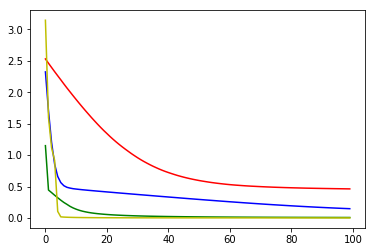

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = 'rbgy'

for i in range(4):
    plt.plot(range(NB_EPOCH), history[i].history.get('loss'), colors[i])

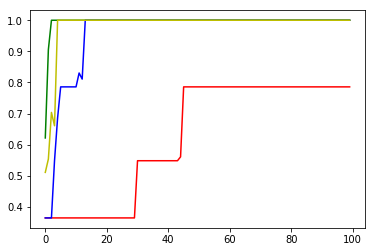

In [6]:
for i in range(4):
    plt.plot(range(NB_EPOCH), history[i].history.get('acc'), colors[i])

### SGD with Decay

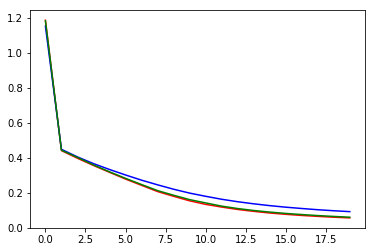

In [7]:
OPTIMIZERS = [SGD(lr = 1), SGD(lr = 1, decay = 0.01), SGD(lr = 1, decay = 0.001)]
NB_EPOCH = 20

history = []

for i in range(3):
    model = Sequential()
    model.add(Dense(6, input_shape = (2,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.get_layer(index=0).set_weights([np.array([[1, -1, 2, -2, 3, -3], [-2, 3, 1, -3, 1, -2]]), np.array([1, 3, 2, -3, -2, -1])])
    model.get_layer(index=2).set_weights([np.array([[1], [-2], [3], [-1], [2], [-3]]), np.array([2])])
          
    model.compile(loss='binary_crossentropy', optimizer=OPTIMIZERS[i], metrics=['accuracy'])
    history.append(model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT))

for i in range(3):
    plt.plot(range(NB_EPOCH), history[i].history.get('loss'), colors[i])    

## 3.3 SGD with Momentum

Polyak (1964) design an algorithm based on gradient descent that accelerate learning that performs better in case of high curvature, small but consistent gradient or noisy gradients

This method accumulates past gradients with exponential decays: i.e, it takes into account the previous gradient, $\alpha$ times the $k-2$-th accumulated gradient, $\alpha^2$ times the $k-3$-th accumulated gradient etc.

### Algorithm

---

**Init**

- Learning rate $\epsilon$
- Momentum parameter $\alpha$
- Velocity (accumulated gradient) $\mathbf v$
- Initial parameter $\mathbf w$

**while stopping criterion not met**

- Sample $M$ examples from the training set $\mathbf x_{(1)}, \ldots, \mathbf x_{(M)}$
- Compute the gradient estimate:
$$
 \mathbf g = \frac1M \nabla \sum_{m=1}^M L(f(\mathbf x_{(m)}, \mathbf w), y_{(m)})
$$

- Update velocity:
$$
\mathbf v = \alpha \mathbf v - \epsilon \mathbf g
$$

- Update $\mathbf w$:
$$
\mathbf w = \mathbf w + \mathbf v
$$
---

<img src="F5.png" width=800><img>

### Remarks

### 1. Role of $\alpha$?

- Impact of the previous accumulated gradient to the current one
- Reduce impact of current gradient
- If every gradient in the past point to the same direction, then the accumulated gradient, after several steps, will reach a norm of
$$
\frac{\epsilon \Vert g \Vert}{1 - \alpha}
$$

$\alpha = 0.9$ leads to accumulated gradient 10 times faster than no-momentum case. This is a much stronger guide to local minimum.

### 2. Pros and Cons

- Large $\alpha$ -> impact of the past too large

### 3. Choice of parameters
- Trial and error
- Pratical use: $\alpha = 0.5, 0.9, 0.99$

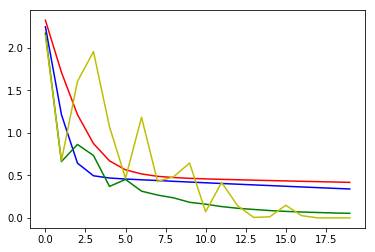

In [8]:
OPTIMIZERS = [SGD(lr = 0.1), SGD(lr = 0.1, momentum = 0.5), SGD(lr = 0.1, momentum = 0.9), SGD(lr = 0.1, momentum = 0.99)]
NB_EPOCH = 20

history = []

for i in range(4):
    model = Sequential()
    model.add(Dense(6, input_shape = (2,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.get_layer(index=0).set_weights([np.array([[1, -1, 2, -2, 3, -3], [-2, 3, 1, -3, 1, -2]]), np.array([1, 3, 2, -3, -2, -1])])
    model.get_layer(index=2).set_weights([np.array([[1], [-2], [3], [-1], [2], [-3]]), np.array([2])])
          
    model.compile(loss='binary_crossentropy', optimizer=OPTIMIZERS[i], metrics=['accuracy'])
    history.append(model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT))

for i in range(4):
    plt.plot(range(NB_EPOCH), history[i].history.get('loss'), colors[i])    

In [9]:
import pandas as pd
pd.DataFrame([history[i].history.get('loss') for i in range(4)]).T

,0,1,2,3
0,2.324618,2.247996,2.173298,2.141983
1,1.712357,1.215570,0.662830,0.671958
2,1.215053,0.644423,0.864302,1.605480
3,0.875033,0.495765,0.734207,1.955268
4,0.671059,0.469469,0.370740,1.071491
5,0.565943,0.457618,0.452846,0.466770
6,0.517310,0.448550,0.314889,1.183527
7,0.489475,0.440198,0.268989,0.429441
8,0.475099,0.430899,0.236474,0.483773
9,0.465912,0.422155,0.183932,0.645652


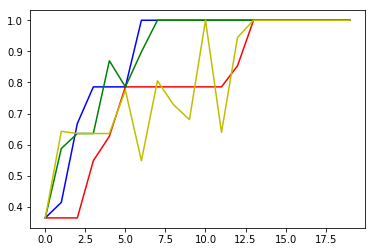

In [10]:
for i in range(4):
    plt.plot(range(NB_EPOCH), history[i].history.get('acc'), colors[i])    

## 3.4 SGD with Nesterov Momentum

Sutskever et al. (2013) introduced a variant of SGD with momentum that was inspired by Nesterov's accelerated gradient method (1983), where the gradient will not be calculated at $\mathbf w$ (current $\mathbf w$) but at $\mathbf + \alpha v$ (after the accumulated gradient is applied). With this correction, in batch case, the rate of convergence of the excess error improves from $O(1/k)$ to $O(1/k^2)$ after $k$ steps. In stochastic case, Nesterov momentum does not improve this rate of convergence.

### Algorithm

---

**Init**

- Learning rate $\epsilon$
- Momentum parameter $\alpha$
- Velocity (accumulated gradient) $\mathbf v$

**while stopping criterion not met**

- Sample $M$ examples from the training set $\mathbf x_{(1)}, \ldots, \mathbf x_{(M)}$
- Apply interim update
$$
\tilde {\mathbf w} = \mathbf w + \alpha \mathbf v
$$
- Compute the gradient estimate:
$$
 \mathbf g = \frac1M \nabla \sum_{m=1}^M L(f(\mathbf x_{(m)}, \tilde {\mathbf w}), y_{(m)})
$$

- Update velocity:
$$
\mathbf v = \alpha \mathbf v - \epsilon \mathbf g
$$

- Update $\mathbf w$:
$$
\mathbf w = \mathbf w + \mathbf v
$$

**end while**

---


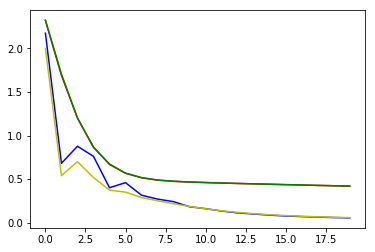

In [11]:
OPTIMIZERS = [SGD(lr = 0.1), SGD(lr = 0.1, momentum = 0.9), SGD(lr = 0.1, nesterov = True), SGD(lr = 0.1, momentum = 0.9, nesterov = True)]
NB_EPOCH = 20

history = []

for i in range(4):
    model = Sequential()
    model.add(Dense(6, input_shape = (2,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.get_layer(index=0).set_weights([np.array([[1, -1, 2, -2, 3, -3], [-2, 3, 1, -3, 1, -2]]), np.array([1, 3, 2, -3, -2, -1])])
    model.get_layer(index=2).set_weights([np.array([[1], [-2], [3], [-1], [2], [-3]]), np.array([2])])
          
    model.compile(loss='binary_crossentropy', optimizer=OPTIMIZERS[i], metrics=['accuracy'])
    history.append(model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT))

for i in range(4):
    plt.plot(range(NB_EPOCH), history[i].history.get('loss'), colors[i])    

In [12]:
import pandas as pd
pd.DataFrame([history[i].history.get('loss') for i in range(4)]).T

,0,1,2,3
0,2.322449,2.175955,2.324443,2.000242
1,1.689675,0.680976,1.707272,0.538985
2,1.201979,0.877011,1.200311,0.699142
3,0.863402,0.760685,0.867540,0.517916
4,0.672675,0.400070,0.667671,0.373251
5,0.567985,0.458576,0.566201,0.349826
6,0.514308,0.314257,0.516718,0.287443
7,0.487730,0.269666,0.488467,0.250478
8,0.473251,0.240148,0.475145,0.216142
9,0.465576,0.181419,0.466136,0.185141


## 3.5 AdaGrad (2011)

In 3.1 to 3.4, we use gradient-base method that updates every coordinate proportionally to their partial derivative.

Their exists other methods that update each coordinate differently.

### AdaGrad Algorithm ###

---

**Init**

- Global learning rate $\epsilon$
- Initial weight $\mathbf w$
- Small constant $\delta$ like $10^{-7}$
- Accumulated squared gradient $r = 0$

**while stopping criterion not met do**

- Sample $M$ examples from the training set $\mathbf x_{(1)}, \ldots, \mathbf x_{(M)}$
- Compute the gradient estimate:
$$
 \mathbf g = \frac1M \nabla \sum_{m=1}^M L(f(\mathbf x_{(m)}, \mathbf w), y_{(m)})
$$

- Update accumulated squared gradient
$$
\mathbf r = \mathbf r + \mathbf g * \mathbf g
$$

($*$: elementwise multiplication) 

- Calculate current velocity
$$
\mathbf v = -\frac{\epsilon}{\delta + \sqrt{\mathbf r}} * \mathbf g
$$
(square root applied element-wisely)

- Update
$$
\mathbf w = \mathbf w + \mathbf v
$$

---

The idea is similar to SGD with momentum, but here the velocity is calculated from an accumulated squared gradient rather than an accumulated gradient with decay.

### Pros and Cons

- *"The parameters with the largest partial derivative of the loss have a correspondingly rapid decrease in their learning rate, while parameters with small partial derivatives have a relatively small decrease in their learning rate."*

- *"For training deep neural network models—the accumulation of squared gradients from the beginning of training can result in a premature and excessive decrease in the effective learning rate."*



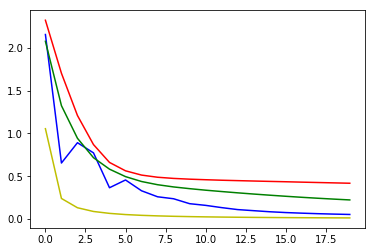

In [13]:
from keras.optimizers import Adagrad

OPTIMIZERS = [SGD(lr = 0.1), SGD(lr = 0.1, momentum = 0.9), Adagrad(lr = 0.1), Adagrad(lr = 0.5)]
NB_EPOCH = 20

history = []

for i in range(4):
    model = Sequential()
    model.add(Dense(6, input_shape = (2,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.get_layer(index=0).set_weights([np.array([[1, -1, 2, -2, 3, -3], [-2, 3, 1, -3, 1, -2]]), np.array([1, 3, 2, -3, -2, -1])])
    model.get_layer(index=2).set_weights([np.array([[1], [-2], [3], [-1], [2], [-3]]), np.array([2])])
          
    model.compile(loss='binary_crossentropy', optimizer=OPTIMIZERS[i], metrics=['accuracy'])
    history.append(model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT))

for i in range(4):
    plt.plot(range(NB_EPOCH), history[i].history.get('loss'), colors[i])    

In [14]:
import pandas as pd
pd.DataFrame([history[i].history.get('loss') for i in range(4)]).T

,0,1,2,3
0,2.323660,2.156687,2.077189,1.055785
1,1.704041,0.654603,1.325323,0.240299
2,1.209970,0.891952,0.943616,0.131744
3,0.870224,0.773360,0.716968,0.088068
4,0.661399,0.365551,0.582764,0.065910
5,0.563410,0.456425,0.495576,0.052023
6,0.513528,0.330085,0.438394,0.042981
7,0.488276,0.259941,0.401033,0.036528
8,0.474611,0.236786,0.374952,0.031670
9,0.465742,0.179219,0.354840,0.027980


## 3.6 RMSProp (2012)

Combine the idea of weighted accumulated and accumulated squared gradient, we have the "momentum" version of Adam

### Algorithm - Version without Nesterov momentum

---

**Init**

- Global learning rate $\epsilon$
- Decay rate $\rho$
- Initial weight $\mathbf w$
- Small constant $\delta$ like $10^{-6}$
- Accumulated squared gradient $r = 0$

**while stopping criterion not met do**

- Sample $M$ examples from the training set $\mathbf x_{(1)}, \ldots, \mathbf x_{(M)}$
- Compute the gradient estimate:
$$
 \mathbf g = \frac1M \nabla \sum_{m=1}^M L(f(\mathbf x_{(m)}, \mathbf w), y_{(m)})
$$

- Update accumulated squared gradient
$$
\mathbf r = \rho \mathbf r + (1-\rho)\mathbf g * \mathbf g
$$

($*$: elementwise multiplication) 

- Calculate current velocity
$$
\mathbf v = -\frac{\epsilon}{\sqrt{\delta + \mathbf r}} * \mathbf g
$$
(square root applied element-wisely)

- Update
$$
\mathbf w = \mathbf w + \mathbf v
$$

---

### Algorithm - Version with Nesterov momentum

---

**Init**

- Global learning rate $\epsilon$
- Decay rate $\rho$
- Initial weight $\mathbf w$
- Small constant $\delta$ like $10^{-6}$
- Accumulated squared gradient $r = 0$

**while stopping criterion not met do**

- Sample $M$ examples from the training set $\mathbf x_{(1)}, \ldots, \mathbf x_{(M)}$
- Interim update:
$$
\tilde{\mathbf w} = \mathbf w + \alpha \mathbf v
$$
- Compute the gradient estimate:
$$
 \mathbf g = \frac1M \nabla \sum_{m=1}^M L(f(\mathbf x_{(m)}, \tilde{\mathbf w}), y_{(m)})
$$

- Update accumulated squared gradient
$$
\mathbf r = \rho \mathbf r + (1-\rho)\mathbf g * \mathbf g
$$

($*$: elementwise multiplication) 

- Calculate current velocity
$$
\mathbf v = -\frac{\epsilon}{\sqrt{\delta + \mathbf r}} * \mathbf g
$$
(square root applied element-wisely)

- Update
$$
\mathbf w = \mathbf w + \mathbf v
$$

---


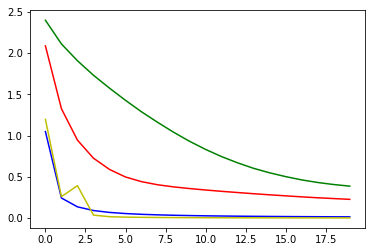

In [15]:
from keras.optimizers import Adagrad, RMSprop

OPTIMIZERS = [Adagrad(lr = 0.1), Adagrad(lr = 0.5), RMSprop(lr = 0.01, rho = 0.9), RMSprop(lr = 0.5, rho=0.9)]
NB_EPOCH = 20

history = []

for i in range(4):
    model = Sequential()
    model.add(Dense(6, input_shape = (2,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.get_layer(index=0).set_weights([np.array([[1, -1, 2, -2, 3, -3], [-2, 3, 1, -3, 1, -2]]), np.array([1, 3, 2, -3, -2, -1])])
    model.get_layer(index=2).set_weights([np.array([[1], [-2], [3], [-1], [2], [-3]]), np.array([2])])
          
    model.compile(loss='binary_crossentropy', optimizer=OPTIMIZERS[i], metrics=['accuracy'])
    history.append(model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT))

for i in range(4):
    plt.plot(range(NB_EPOCH), history[i].history.get('loss'), colors[i])

In [16]:
import pandas as pd
pd.DataFrame([history[i].history.get('loss') for i in range(4)]).T

,0,1,2,3
0,2.087771,1.047895,2.399024,1.196072
1,1.325376,0.241827,2.111477,0.258754
2,0.943954,0.134676,1.907291,0.391507
3,0.724951,0.089943,1.731581,0.034008
4,0.588696,0.066912,1.574766,0.014902
5,0.496765,0.053148,1.427104,0.010069
6,0.440220,0.043980,1.287672,0.007283
7,0.402641,0.037421,1.160859,0.005511
8,0.376836,0.032502,1.040034,0.004218
9,0.356646,0.028699,0.929887,0.003236


*"Empirically, RMSProp has been shown to be an effective and practical optimization algorithm for deep neural networks. It is currently one of the go-to optimization methods being employed routinely by deep learning practitioners."*

## 3.7 Adam (2014)

Adam stands for "Adaptive moments". Its idea:
- Momentum is incorporated directly as an estimate of the first order moment of the gradient by applying to the rescaled gradient.
- Include bias corrections to the estimates of first-order and second-order moment

### Algorithm

---

**Init**

- Initial weight $\mathbf w$
- Global learning rate $\epsilon (=0.001)$
- Decay rates moments $\rho_1 (=0.9)$, $\rho_2 (=0.999)$
- Small constant $\delta (=10^{-8}$ for numerical st
- First moment $\mathbf s = 0$
- Second moment $\mathbf r = 0$
- Time step $t = 0$

**while stopping criterion not met do**

- Sample $M$ examples from the training set $\mathbf x_{(1)}, \ldots, \mathbf x_{(M)}$

- Compute the gradient estimate:
$$
 \mathbf g = \frac1M \nabla \sum_{m=1}^M L(f(\mathbf x_{(m)}, \mathbf w), y_{(m)})
$$

- Update time step
t = t + 1

- Update first moment estimate (accumulated gradient):
$$
\mathbf s = \rho_1 \mathbf s + (1-\rho_1)\mathbf g
$$

- Update second moment estimate (accumulated squared gradient)
$$
\mathbf r = \rho_2 \mathbf r + (1-\rho_2)\mathbf g * \mathbf g
$$

($*$: elementwise multiplication) 

- Correct bias in first moment
$$
\hat{\mathbf s} = \frac{\mathbf s}{1-\rho_1^t}
$$

- Correct bias in second moment
$$
\hat{\mathbf r} = \frac{\mathbf r}{1-\rho_2^t}
$$

- Calculate current velocity
$$
\mathbf v = -\frac{\epsilon\hat{\mathbf s}}{\sqrt{\hat{\mathbf r}} + \delta}
$$
(square root applied element-wisely)

- Update
$$
\mathbf w = \mathbf w + \mathbf v
$$

**end while**

---

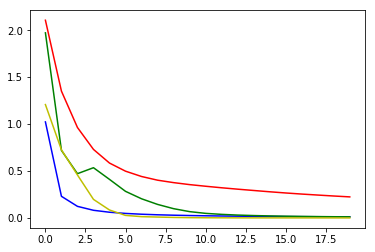

In [50]:
from keras.optimizers import Adam

OPTIMIZERS = [Adagrad(lr = 0.1), Adagrad(lr = 0.5), Adam(lr = 0.1, beta_1=0.9, beta_2=0.999), Adam(lr = 0.5, beta_1=0.9, beta_2=0.999)]
NB_EPOCH = 20

history = []

for i in range(4):
    model = Sequential()
    model.add(Dense(6, input_shape = (2,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.get_layer(index=0).set_weights([np.array([[1, -1, 2, -2, 3, -3], [-2, 3, 1, -3, 1, -2]]), np.array([1, 3, 2, -3, -2, -1])])
    model.get_layer(index=2).set_weights([np.array([[1], [-2], [3], [-1], [2], [-3]]), np.array([2])])
          
    model.compile(loss='binary_crossentropy', optimizer=OPTIMIZERS[i], metrics=['accuracy'])
    history.append(model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT))

for i in range(4):
    plt.plot(range(NB_EPOCH), history[i].history.get('loss'), colors[i])

In [51]:
import pandas as pd
pd.DataFrame([history[i].history.get('loss') for i in range(4)]).T

,0,1,2,3
0,2.105622,1.023149,1.971555,1.207666
1,1.351081,0.231095,0.719892,0.726155
2,0.963706,0.124144,0.472048,0.458256
3,0.730381,0.082245,0.535597,0.198262
4,0.585064,0.061533,0.411294,0.085325
5,0.498640,0.048856,0.283955,0.027889
6,0.442077,0.040340,0.204837,0.014492
7,0.402790,0.034359,0.144934,0.010214
8,0.376828,0.029914,0.099480,0.006159
9,0.355668,0.026448,0.067972,0.003776


There exists "Nadam", i.e., Adam with Nesterov momentum.

# 4. Second-order Methods

## 4.1 Newton's Method

Based on Taylor series expansion
$$
J(\mathbf w) \approx J(\mathbf w_0) + (\mathbf w - \mathbf w_0)^t \nabla J(\mathbf w_0) + \frac12 (\mathbf w - \mathbf w_0)^t \mathbf H(\mathbf w_0) (\mathbf w - \mathbf w_0)
$$
in a neighborhood of $\mathbf w_0$.

To solve the minimum problem $\min J(\mathbf w)$, we can look for a minimum of the right-hand side. It leads to
$$
\mathbf w^\star = \mathbf w_0 - \mathbf H^{-1} \mathbf w_0
$$

If the function $J$ is quadratic, $\mathbf w$ will be the global minimum/maximum of the function. If not, the method suggests iterate this step until a convergence condition is met.

### Algorithm
---

**Init**

- Initial parameter $\mathbf w$

**while stopping criterion not met**
- Calculate gradient 
$$
\mathbf g = \frac1N \nabla \sum_n L(f(\mathbf x_{(n)}, \mathbf w), y_{(n)})
$$
- Calculate Hessian
$$
\mathbf H = \frac1N \nabla^2 \sum_n L(f(\mathbf x_{(n)}, \mathbf w), y_{(n)})
$$
- Calculate Hessian inverse $\mathbf H^{-1}$

- Update $\mathbf w$
$$
\mathbf w = \mathbf w -\mathbf H^{-1} \mathbf g
$$

**End while**

---

### Remarks

### 1. Pros and Cons?

- Works well if Hessian positive definite
- Gets stuck with saddle points
- very costly to compute Hessian inverse in high dimension ($O(D^3)$)

### 2. Regularization

Regularization can help escaping saddle points when negative eigenvalues are small in absolute value.

### Algorithm
---

**Init**

- Initial parameter $\mathbf w$
- Penalty coefficient $\alpha$

**while stopping criterion not met**
- Calculate gradient 
$$
\mathbf g = \frac1N \nabla \sum_n L(f(\mathbf x_{(n)}, \mathbf w), y_{(n)})
$$
- Calculate Hessian
$$
\mathbf H = \frac1N \nabla^2 \sum_n L(f(\mathbf x_{(n)}, \mathbf w), y_{(n)})
$$
- Calculate regularized Hessian inverse 
$$
\mathbf K = (\mathbf H + \alpha \mathbf I)^{-1}
$$

- Update $\mathbf w$
$$
\mathbf w = \mathbf w -\mathbf K \mathbf g
$$

**End while**

---

When strong negative curvature is present, $\alpha$ needs to be large, $\alpha \mathbf I$ becomes dominant so Newton's update is close to gradient descent.

## 4.2 Conjugate Gradients

Performing a line search with gradient descent will leads to consecutive orthogonal gradients, hence yield to zig-zag path to the local minimum.

Indeed, at step $t-1$, the gradient is $\mathbf g_{t-1}$. Searching along this direction will lead to $\mathbf w_t$ where $\nabla J(\mathbf w_t) \cdot \mathbf w_{t-1} = 0$. As $\mathbf g_t = \nabla J(\mathbf w_t)$, we have $\mathbf w_t \perp \mathbf w_{t-1}$.

**Example**

$$
f(x, y) = x^4 + y^4
$$

$$
\nabla f(x, y) = (4x^3, 4y^3)
$$

In [19]:
def f(X):
    x, y = X[0], X[1]
    return x**4 + y**4

def gradf(X):
    x, y = X[0], X[1]
    return np.array([4*x**3, 4*y**3])
                    
current_weight = np.array([5, 3])
epsilons = []
max_interval = []
weights = [current_weight]
values = [f(current_weight)]

for i in (range(5)):
    print("Step %d" % i)
    grad = gradf(current_weight)
    best_epsilon = 0
    interval = np.linspace(0, np.linalg.norm(current_weight)/10*(5**i), 1000)
    best_value = f(current_weight)
    for epsilon in interval:
        current_value = f(current_weight - epsilon * grad)
        if current_value < best_value:
            best_value = current_value
            best_epsilon = epsilon
    current_weight = current_weight - best_epsilon * grad
    weights.append(current_weight)
    values.append(best_value)


Step 0
Step 1
Step 2
Step 3
Step 4


In [20]:
values

[706,
 9.516990762413934,
 0.08269555648803577,
 0.0007339975205425293,
 0.00028965866132424616,
 2.3258279050465376e-05]

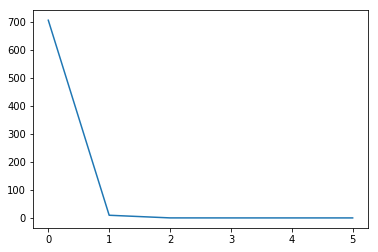

In [21]:
plt.plot(range(6), values)

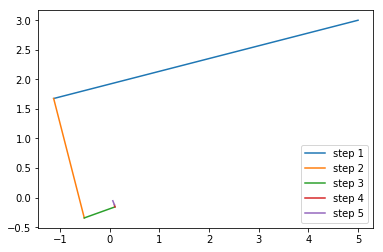

In [22]:
for i in range(5):
    plt.plot([weights[i][0], weights[i+1][0]], [weights[i][1], weights[i+1][1]], label = "step %d"%(i+1))
plt.legend()

The previous direction has no contribution to the new direction.

We will find a search direction that is conjugate to the previous line search direction in the following form
$$
\mathbf d_t = \nabla J(\mathbf w) + \beta_t \mathbf d_{t-1}
$$

where $\beta_t$ is chosen such that $\mathbf d_t\mathbf H \mathbf d_{t-1} = 0$. For a quadratic surface, this will ensure that the gradient along the previous direction will not increase in magnitude.

### Algorithm

---

**Init**

- Initial parameter $\mathbf w$
- Initial direction $\mathbf d_0$
- Initial gradient $\mathbf g_0$
- Step t = 1

**while stopping criterion not met**
- Calculate gradient 
$$
\mathbf g = \frac1N \nabla \sum_n L(f(\mathbf x_{(n)}, \mathbf w), y_{(n)})
$$

- Compute $\beta_t$ in one of the following ways:
$$
\beta_t = \frac{(\mathbf g_t - \mathbf g_{t-1})^t \mathbf g_t}{\mathbf g_{t-1}^t \mathbf g_t}
$$
(Polak-Ribière)
$$
\beta_t = \frac{\mathbf g^t \mathbf g_t}{\mathbf g_{t-1}^t \mathbf g_t}
$$
(Fletcher Reeves)
- Calculate search direction
$$
\mathbf d_t = -\mathbf g_t + \beta_t \mathbf d_{t-1}
$$
- Perform line search to find
$$
\epsilon^\star =\arg\min_\epsilon  \sum_n L(f(\mathbf x_{(n)}, \mathbf w_t + \epsilon \mathbf d_t), y_{(n)})
$$

- Update $\mathbf w$
$$
\mathbf w_{t+1} = \mathbf w + \epsilon^\star \mathbf d_t
$$

- Update $t$
$$
t = t + 1
$$

**End while**

---

In [23]:
def f(X):
    x, y = X[0], X[1]
    return x**4 + y**4

def gradf(X):
    x, y = X[0], X[1]
    return np.array([4*x**3, 4*y**3])

In [24]:
w = [[], np.array([5, 3])]
d = [0]
g = [0]
beta = [0]
values = [f(w[1])]
maxx = []
es = []

for i in range(1, 6):
    g.append(0)
    g[i] = gradf(w[i])
    if i >= 2:
        beta.append(np.dot(g[i], g[i])/np.dot(g[i-1], g[i-1]))
    else:
        beta.append(0)
    d.append(-g[i] + beta[i] * d[i-1])
    best_epsilon = 0
    interval = np.linspace(0, np.linalg.norm(w[i])/10*5**i, 1000)
    best_value = f(w[i])    
    for epsilon in interval:
        current_value = f(w[i] + epsilon * d[i])
        if current_value < best_value:
            best_value = current_value
            best_epsilon = epsilon
    es.append(best_epsilon)
    w.append(w[i] + best_epsilon * d[i])
    values.append(f(w[i+1]))

values

[706,
 9.640946066040996,
 0.24026414679561758,
 0.007172702986521916,
 8.560208211450443e-05,
 5.043386261546047e-07]

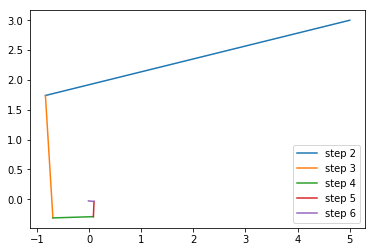

In [25]:
for i in range(1,6):
    plt.plot([w[i][0], w[i+1][0]], [w[i][1], w[i+1][1]], label = "step %d"%(i+1))
plt.legend()

## 4.3 BFGS (Broyden-Fletcher-Goldfarb-Shanno)

BFGS is a method that approximates Newton's one, but using an approximation of Hessian.


### Algorithm

---

**Init**

- Initial parameter $\mathbf w$
- Initial direction $\mathbf d_0$
- Initial gradient $\mathbf g_0$
- Initial approximated-Hessian $\mathbf B_0 = \mathbf I$
- Step k = 1

**while stopping criterion not met**
- Calculate gradient 
$$
\mathbf g = \frac1N \nabla \sum_n L(f(\mathbf x_{(n)}, \mathbf w), y_{(n)})
$$

- Compute the direction $\mathbf d_k$
$$
 \mathbf d_k = -\mathbf B_k^{-1} \mathbf g_k
$$

- Perform a line search to get
$$
\epsilon^\star = \arg\min_\epsilon f(\mathbf w_k + \epsilon \mathbf d_k)
$$

- Update $\mathbf w$
$$
\mathbf w_{k+1} = \mathbf w_k + \epsilon^\star \mathbf d_k
$$

- Calculate the gradient difference
$$
\mathbf z_k = \mathbf g_{k+1} -\mathbf g_{k}
$$

- Update $t$
$$
t = t + 1
$$

**End while**

---

$B_k$ can be calculated as:
$$
\mathbf B_{k+1} = \mathbf B_k + \frac{\mathbf z_k \mathbf z_k^t}{\epsilon^\star \mathbf z_k^t \mathbf d_k} - \frac{\mathbf B_k \mathbf z_k \mathbf z_k^t \mathbf B_k}{\epsilon^\star \mathbf d_k^t \mathbf B_k \mathbf d_k}
$$


The inverse matrix can be calculated by
$$
\mathbf B_{k+1}^{-1} = \left(\mathbf I - \frac{\mathbf d_k \mathbf z_k^t}{\mathbf z_k^t \mathbf d_k} \right) \mathbf B_k^{-1} \left( \mathbf I - \frac{\mathbf z_k \mathbf d_k^t}{\mathbf z_k^t \mathbf d_k} \right) + \epsilon_k \frac{\mathbf d_k \mathbf d_k^t }{\mathbf z_k^t\mathbf d_k}
$$

### Remarks

- In comparison with Newton's method, the inverse of a matrix can be computed efficiently in $O(D^2)$ at each step.
- Tthe algorithm still requires $O(D^2)$ in memory.

## 4.4 L-BFGS (Limited-memory BFGS

It uses the same algorith as BFGS, but for calculation of the inverse, it uses:

$$
\mathbf B_{k+1}^{-1} = \left(\mathbf I - \frac{\mathbf d_k \mathbf z_k^t}{\mathbf z_k^t \mathbf d_k} \right) \left( \mathbf I - \frac{\mathbf z_k \mathbf d_k^t}{\mathbf z_k^t \mathbf d_k} \right) + \epsilon_k \frac{\mathbf d_k \mathbf d_k^t }{\mathbf z_k^t\mathbf d_k}
$$

# 5. Initialization

- Training algorithms for deep models are strongly affected by the choice of initialization.

- FFN and some networks have symmetry between variables. If we initialize them by the same value, they will be processed the same way during the training procedure with deterministic algorithms.

- We can avoid this problem by initialize the algorithm with random values.

- Glorot & Bengio suggests for fully connected layer $k$ in a FFN with $n$ input, $m$ to initialize with
$$
\mathbf w_{i, j}^{(k)} \sim U\left(-\sqrt{\frac{6}{m+n}}, \sqrt{\frac{6}{m+n}}\right)
$$
and keep the bias 0.

- There are other suggestions

# References

[1] I. Goodfellow, *Deep Learning*

[2] https://keras.io/optimizers/